# Импорт библиотек

In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools

### Отключим предупреждения Anaconda

In [2]:
warnings.simplefilter('ignore')

# Загрузим данные

In [3]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/y.pkl.gz', 'rb'))

# N-PLS1

## Выберем столбец у с которым будем работать

In [4]:
m=0

## Посчитаем Z

In [5]:
z=np.zeros([206,55])

In [6]:
for i in range(0,55):
    for j in range(0,206):
        zsum=0
        for k in range(0,35):
            zsum+=Xdata_numpy['X'][k,j,i]*Ydata.iloc[k,m]
        z[j,i]=zsum

In [7]:
z

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , 30.42741355, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 29.76362119, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 29.36079377, ...,  0.        ,
         0.        ,  0.        ]])

## Разложим Z на вектора W$^{J}_{f}$ и W$^{I}_{f}$

In [8]:
Wk, S, WI = np.linalg.svd(z)

In [9]:
WI.shape

(55, 55)

In [10]:
import matplotlib.pyplot as plt
plt.imshow(WI, aspect="auto")
plt.show();

<Figure size 640x480 with 1 Axes>

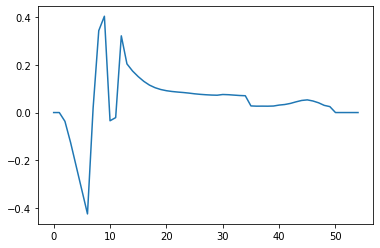

In [11]:
plt.plot(WI[3,:])
plt.show();

# Перейду к подбору нужной комбинации векторов для кронекеровского произведения для весов

In [ ]:
for i in range(0,206):
    for j in range(0,55):
        w_k=Wk[i,:]
        w_i=WI[j,:]
        t=[]
        for h in range(0,35):
            t+=[w_k.transpose*Xdata_numpy['X'][h,:,:]*w_i]
        t=np.array([t])
        T+=[t]
        T=np.array([T])

### Завтра переделай алгоритм на основе того, что осознал сегодня

In [81]:
x=Xdata_numpy['X']

In [82]:
y=Ydata.iloc[:,m]

In [83]:
x=np.array(x)

In [84]:
y

0     45.446791
1     53.715968
2     39.837588
3     31.410666
4     42.444629
5     36.479939
6     36.112553
7     44.049334
8     35.354605
9     47.441840
10    47.577334
11    38.622683
12    44.546831
13    35.724431
14    54.640664
15    49.409746
16    26.197475
17    36.226228
18    43.272738
19    34.070473
20    34.193088
21    33.342049
22    41.039801
23    47.996257
24    42.147702
25    34.242464
26    36.909160
27    28.183879
28    21.411182
29    46.322119
30    44.399737
31    39.901821
32    56.046637
33    35.398815
34    35.695793
Name: Gominy, dtype: float64

In [103]:
Tt=[]
for f in range(0,5):
    z=z=np.zeros([206,55])
    for i in range(0,55):
        for j in range(0,206):
            zsum=0
            for k in range(0,35):
                zsum= zsum+ x[k,j,i]*y[k]
            z[j,i]=zsum
    Wk, S, WI = np.linalg.svd(z)
    w_k=np.array(Wk[0,:]).reshape(206,1)
    w_i=np.array(WI[0,:]).reshape(55,1)
    
    t=[]
    for h in range(0,35):
        t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
    t=np.array(t).reshape(35,1)
    print(t)
    Tt+=[t]
    T=np.array(Tt).reshape(35,f+1)
    print(T.shape)
    bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
    
    for g in range(0,35):
        x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
    y=y-(np.dot(T,bf))
    print(y.shape)

[[-2.01144184]
 [-2.1504415 ]
 [-1.7202714 ]
 [-2.95342895]
 [-2.42663581]
 [-2.15400904]
 [-1.09877155]
 [-3.36253554]
 [-1.90014542]
 [-2.70099868]
 [-1.82883787]
 [-2.93970016]
 [-2.83780924]
 [-4.00658656]
 [-3.03228195]
 [-1.12616308]
 [-3.29050622]
 [-2.55941702]
 [-1.57321321]
 [-2.12120329]
 [-2.34309875]
 [-2.93677961]
 [-3.65554969]
 [-2.88792647]
 [-1.04836927]
 [-1.65617615]
 [-2.01983542]
 [-1.77225543]
 [-1.64768427]
 [-2.08907253]
 [-1.33643469]
 [-2.05561632]
 [-1.92947908]
 [-1.71985269]
 [-1.90649933]]
(35, 1)
(35,)
[[0.05484985]
 [0.05015674]
 [0.0546844 ]
 [0.08891414]
 [0.06109327]
 [0.05452046]
 [0.03525208]
 [0.09658078]
 [0.04817085]
 [0.06640316]
 [0.05941768]
 [0.07687477]
 [0.065845  ]
 [0.11227095]
 [0.06745662]
 [0.03109581]
 [0.08252737]
 [0.07701239]
 [0.04299229]
 [0.06850241]
 [0.06280546]
 [0.08040772]
 [0.103241  ]
 [0.08004393]
 [0.03094619]
 [0.03984793]
 [0.04688587]
 [0.05355597]
 [0.04546969]
 [0.06421797]
 [0.02737423]
 [0.04602207]
 [0.05158234

In [54]:
print(y.shape)

()


In [44]:
y

<bound method NDFrame.copy of        Gominy       Tyr       Trp
0   45.446791  3.718645  1.658959
1   53.715968  1.519253  2.908843
2   39.837588  3.514326  1.093680
3   31.410666  4.107808  2.413380
4   42.444629  2.397802  2.822168
5   36.479939  1.771192  3.826668
6   36.112553  2.080763  0.700694
7   44.049334  3.959066  3.163625
8   35.354605  1.172333  2.195268
9   47.441840  3.046104  4.011521
10  47.577334  3.345482  1.008305
11  38.622683  2.530967  3.533570
12  44.546831  0.838763  4.215091
13  35.724431  4.261243  4.150726
14  54.640664  2.577719  3.679025
15  49.409746  1.336314  0.847238
16  26.197475  2.164723  4.313643
17  36.226228  3.546828  1.899125
18  43.272738  1.845509  1.326550
19  34.070473  3.942426  1.985984
20  34.193088  1.458561  3.409581
21  33.342049  3.152387  3.504425
22  41.039801  3.836094  3.841496
23  47.996257  2.959377  3.267010
24  42.147702  1.660952  0.743222
25  34.242464  0.978959  2.295310
26  36.909160  0.675008  2.593348
27  28.183879  3.2